# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_type_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_ride_count = rural_cities_df.count()["ride_id"]
suburban_ride_count = suburban_cities_df.count()["ride_id"]
urban_ride_count = urban_cities_df.count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type
city_type_driver_total = pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_type_driver_total.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
rural_driver_count = rural_cities_df.sum()["driver_count"]
suburban_driver_count = suburban_cities_df.sum()["driver_count"]
urban_driver_count = urban_cities_df.sum()["driver_count"]

In [7]:
#  3. Get the total amount of fares for each city type
city_type_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
city_type_fare_total.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
rural_fare_total = rural_cities_df.sum()["fare"]
suburban_fare_total = suburban_cities_df.sum()["fare"]
urban_fare_total = urban_cities_df.sum()["fare"]

In [9]:
#  4. Get the average fare per ride for each city type. 
city_type_average_ride_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
city_type_average_ride_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [10]:
rural_average_ride_fare = rural_cities_df.mean()["fare"]
suburban_average_ride_fare = suburban_cities_df.mean()["fare"]
urban_average_ride_fare = urban_cities_df.mean()["fare"]

In [11]:
# 5. Get the average fare per driver for each city type. 
city_type_average_driver_fare = city_type_fare_total.div(city_type_driver_total);
city_type_average_driver_fare.head()

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [12]:
rural_average_driver_fare = (rural_fare_total/rural_driver_count)
suburban_average_driver_fare = (suburban_fare_total/suburban_driver_count)
urban_average_driver_fare = (urban_fare_total/urban_driver_count)

In [13]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          [{"Rural Ride Count": rural_ride_count, 
            "Suburban Ride Count": suburban_ride_count, 
            "Urban Ride Count": urban_ride_count,
            "Rural Driver Count": rural_driver_count,
            "Suburban Driver Count": suburban_driver_count,
            "Urban Driver Count": urban_driver_count,
            "Rural Fare Total": rural_fare_total,
            "Suburban Fare Total": suburban_fare_total,
            "Urban Fare Total": urban_fare_total,
            "Rural Avg. Ride Fare": rural_average_ride_fare,
            "Suburban Avg. Ride Fare": suburban_average_ride_fare,
            "Urban Avg. Ride Fare": urban_average_ride_fare,
            "Rural Avg. Driver Fare": rural_average_driver_fare,
            "Suburban Avg. Driver Fare": suburban_average_driver_fare,
            "Urban Avg. Driver Fare": urban_average_driver_fare}])
pyber_summary_df

,Rural Ride Count,Suburban Ride Count,Urban Ride Count,Rural Driver Count,Suburban Driver Count,Urban Driver Count,Rural Fare Total,Suburban Fare Total,Urban Fare Total,Rural Avg. Ride Fare,Suburban Avg. Ride Fare,Urban Avg. Ride Fare,Rural Avg. Driver Fare,Suburban Avg. Driver Fare,Urban Avg. Driver Fare
0,125,625,1625,537,8570,59602,4327.93,19356.33,39854.38,34.62344,30.970128,24.525772,8.05946,2.258615,0.668675


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [15]:
#  8. Format the columns.
# Format the counts to have the comma for a thousands separator.
pyber_summary_df["Urban Ride Count"] = pyber_summary_df["Urban Ride Count"].map("{:,}".format)
pyber_summary_df["Suburban Driver Count"] = pyber_summary_df["Suburban Driver Count"].map("{:,}".format)
pyber_summary_df["Urban Driver Count"] = pyber_summary_df["Urban Driver Count"].map("{:,}".format)
# Format the calulations involving fare to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Rural Fare Total"] = pyber_summary_df["Rural Fare Total"].map("${:,.2f}".format)
pyber_summary_df["Suburban Fare Total"] = pyber_summary_df["Suburban Fare Total"].map("${:,.2f}".format)
pyber_summary_df["Urban Fare Total"] = pyber_summary_df["Urban Fare Total"].map("${:,.2f}".format)
pyber_summary_df["Rural Avg. Ride Fare"] = pyber_summary_df["Rural Avg. Ride Fare"].map("${:,.2f}".format)
pyber_summary_df["Suburban Avg. Ride Fare"] = pyber_summary_df["Suburban Avg. Ride Fare"].map("${:,.2f}".format)
pyber_summary_df["Urban Avg. Ride Fare"] = pyber_summary_df["Urban Avg. Ride Fare"].map("${:,.2f}".format)
pyber_summary_df["Rural Avg. Driver Fare"] = pyber_summary_df["Rural Avg. Driver Fare"].map("${:,.2f}".format)
pyber_summary_df["Suburban Avg. Driver Fare"] = pyber_summary_df["Suburban Avg. Driver Fare"].map("${:,.2f}".format)
pyber_summary_df["Urban Avg. Driver Fare"] = pyber_summary_df["Urban Avg. Driver Fare"].map("${:,.2f}".format)
pyber_summary_df

,Rural Ride Count,Suburban Ride Count,Urban Ride Count,Rural Driver Count,Suburban Driver Count,Urban Driver Count,Rural Fare Total,Suburban Fare Total,Urban Fare Total,Rural Avg. Ride Fare,Suburban Avg. Ride Fare,Urban Avg. Ride Fare,Rural Avg. Driver Fare,Suburban Avg. Driver Fare,Urban Avg. Driver Fare
0,125,625,"1,625",537,"8,570","59,602","$4,327.93","$19,356.33","$39,854.38",$34.62,$30.97,$24.53,$8.06,$2.26,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
daily_fare_by_city_type = pyber_data_df.groupby(["type","date"]).sum()["fare"]
daily_fare_by_city_type

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [18]:
rural_daily_fare_total = rural_cities_df.groupby(["date"]).sum()["fare"]
suburban_daily_fare_total = suburban_cities_df.groupby(["date"]).sum()["fare"]
urban_daily_fare_total = urban_cities_df.groupby(["date"]).sum()["fare"]

In [19]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
reset_df = daily_fare_by_city_type.reset_index()
rural_reset_df = rural_daily_fare_total.reset_index()
suburban_reset_df = suburban_daily_fare_total.reset_index()
urban_reset_df = urban_daily_fare_total.reset_index()

In [20]:
reset_df = reset_df.astype({"date":"datetime64"})

In [21]:
reset_df['normalized_date'] = reset_df['date'].dt.normalize()

In [22]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = pd.pivot_table(reset_df, index="normalized_date", columns="type", values="fare", aggfunc=np.sum, fill_value=0)
pivot_df

type,Rural,Suburban,Urban
normalized_date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,0.00,101.36,506.89
...,...,...,...
2019-05-04,0.00,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [32]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
specific_date= pivot_df.loc["2019-01-01" : "2019-04-29"]
specific_date

type,Rural,Suburban,Urban
normalized_date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,0.00,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,0.00,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [33]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
specific_date.index = pd.to_datetime(specific_date.index)

In [34]:
# 7. Check that the datatype for the index is datetime using df.info()
specific_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     119 non-null    float64
 1   Suburban  119 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [36]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_df= specific_date.resample('W', level=0).sum()

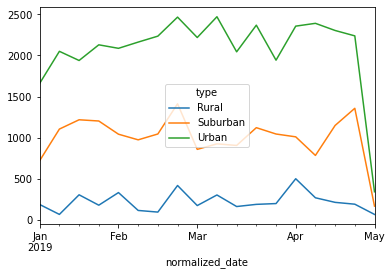

In [38]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
lines = resample_df.plot.line()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')